In [90]:
# Import Directories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
% matplotlib inline
import os
import csv

# Create path for data file
clean_file = os.path.join('..', 'cleanData', 'CleanFullDataSet.csv')

# Use read_csv function 
clean_data = pd.read_csv(clean_file, low_memory = False)

In [91]:
# Check All Columns
clean_data.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [92]:
# Display Relevant Population Columns
exploring_columns_df = pd.DataFrame(clean_data[['Citizenship Country', 'Citizenship Region', 'Citizenship Sub-Region', 'Exploit Country', 'Exploit Region', 'Exploit Sub-Region', 'Exploit Intermediate Region']])
exploring_columns_df.head(5)

,Citizenship Country,Citizenship Region,Citizenship Sub-Region,Exploit Country,Exploit Region,Exploit Sub-Region,Exploit Intermediate Region
0,Colombia,Americas,Latin America and the Caribbean,unknown,unknown,unknown,unknown
1,Colombia,Americas,Latin America and the Caribbean,unknown,unknown,unknown,unknown
2,Colombia,Americas,Latin America and the Caribbean,unknown,unknown,unknown,unknown
3,Colombia,Americas,Latin America and the Caribbean,unknown,unknown,unknown,unknown
4,Colombia,Americas,Latin America and the Caribbean,unknown,unknown,unknown,unknown


In [93]:
# Checking Relevant Column Totals
exploring_columns_df.nunique()

Citizenship Country            45
Citizenship Region              5
Citizenship Sub-Region         10
Exploit Country                58
Exploit Region                  5
Exploit Sub-Region             14
Exploit Intermediate Region     6
dtype: int64

In [94]:
# Narrow Down Scope
countries_df = pd.DataFrame(clean_data[['Citizenship Country', 'Exploit Country']])
countries_df.head(5)

,Citizenship Country,Exploit Country
0,Colombia,unknown
1,Colombia,unknown
2,Colombia,unknown
3,Colombia,unknown
4,Colombia,unknown


In [95]:
# Showing Breakdown of Total Cases In Citizenship Countries
countries_df['Citizenship Country'].value_counts()

Philippines                         11365
unknown                              9136
Ukraine                              7761
Republic of Moldova                  5901
United States of America             3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People's Democratic Republic      126
Colombia                              124
Nigeria                               108
Afghanistan                            97
Madagascar                             94
Sri Lanka                              85
Sierra Leone                      

In [125]:
# Creating Header Names
citizenship_counts = countries_df['Citizenship Country'].value_counts().rename_axis('Country').reset_index(name = 'Total Cases')
citizenship_counts.head(5)

,Country,Total Cases
0,Philippines,11365
1,unknown,9136
2,Ukraine,7761
3,Republic of Moldova,5901
4,United States of America,3636


In [97]:
# Showing Breakdown of Total Cases In Exploit Countries
countries_df['Exploit Country'].value_counts()

United States of America    12512
unknown                     10175
Ukraine                      5399
Republic of Moldova          4504
Russian Federation           2738
Philippines                  1988
Indonesia                    1777
Cambodia                     1000
Malaysia                      930
Ghana                         544
United Arab Emirates          504
Belarus                       400
Thailand                      391
Senegal                       370
Bulgaria                      356
Haiti                         339
Poland                        326
Saudi Arabia                  278
Romania                       259
Serbia                        248
Qatar                         239
Kazakhstan                    222
Kuwait                        209
Turkey                        197
North Macedonia               194
Uzbekistan                    193
Bosnia and Herzegovina        127
Uganda                        123
Japan                         111
Jordan        

In [126]:
# Creating Header Names
exploit_counts = countries_df['Exploit Country'].value_counts().rename_axis('Country').reset_index(name = 'Total Cases')
exploit_counts.head(5)

,Country,Total Cases
0,United States of America,12512
1,unknown,10175
2,Ukraine,5399
3,Republic of Moldova,4504
4,Russian Federation,2738


In [99]:
# Data File for Population Density
population_file = os.path.join('..', 'data', 'Population_Density.csv')

# Read Data File
population_density_data = pd.read_csv(population_file, encoding = 'latin-1')

# https://worldpopulationreview.com/country-rankings/countries-by-density

In [100]:
# Display Population DataFrame

population_density_data.columns

Index(['country', 'density (km^2)', 'pop2020', 'area (km^2)'], dtype='object')

In [101]:
# Rename Population_Density.csv Columns

population_density_data_renamed = population_density_data.rename(columns = {'country' : 'Country', 'density (km^2)' : 'Density (km²)', 'pop2020' : 'Population', 'area (km^2)' : 'Area (km²)'})
population_density_data_renamed.head(5)

,Country,Density (km²),Population,Area (km²)
0,Singapore,8239.9183,5850.342,710
1,Hong Kong,6790.7437,7496.981,1104
2,Bahrain,2224.2810,1701.575,765
3,Bangladesh,1116.0086,164689.383,147570
4,Lebanon,653.0277,6825.445,10452


In [102]:
citizenship_counts.columns

Index(['Country', 'Total Cases'], dtype='object')

In [103]:
exploit_counts.columns

Index(['Country', 'Total Cases'], dtype='object')

In [124]:
# Merge Population & Citizenship Country 
citizenship_density_merged = pd.merge(citizenship_counts, population_density_data_renamed)
citizenship_density_merged.head(5)

,Country,Total Cases,Density (km²),Population,Area (km²)
0,Philippines,11365,320.0821,109581.078,342353
1,Ukraine,7761,72.4669,43733.762,603500
2,Republic of Moldova,5901,119.1858,4033.963,33846
3,United States of America,3636,35.3160,331002.651,9372610
4,Cambodia,1979,92.3521,16718.965,181035


In [106]:
# Rename Country Column to Citizenship Country
citizenship_density_merged_renamed = citizenship_density_merged.rename(columns = {'Country' : 'Citizenship Country'})
citizenship_density_merged_renamed.head(5)

,Citizenship Country,Total Cases,Density (km²),Population,Area (km²)
0,Philippines,11365,320.0821,109581.078,342353
1,Ukraine,7761,72.4669,43733.762,603500
2,Republic of Moldova,5901,119.1858,4033.963,33846
3,United States of America,3636,35.3160,331002.651,9372610
4,Cambodia,1979,92.3521,16718.965,181035


In [123]:
# Combine Population & Exploit Country
exploit_density_merged = pd.merge(exploit_counts, population_density_data_renamed)
exploit_density_merged.head(5)

,Country,Total Cases,Density (km²),Population,Area (km²)
0,United States of America,12512,35.3160,331002.651,9372610
1,Ukraine,5399,72.4669,43733.762,603500
2,Republic of Moldova,4504,119.1858,4033.963,33846
3,Philippines,1988,320.0821,109581.078,342353
4,Indonesia,1777,143.6144,273523.615,1904569


In [110]:
# Rename Country Column to Citizenship Country
exploit_density_merged_renamed = exploit_density_merged.rename(columns = {'Country' : 'Exploit Country'})
exploit_density_merged_renamed.head(5)

,Exploit Country,Total Cases,Density (km²),Population,Area (km²)
0,United States of America,12512,35.3160,331002.651,9372610
1,Ukraine,5399,72.4669,43733.762,603500
2,Republic of Moldova,4504,119.1858,4033.963,33846
3,Philippines,1988,320.0821,109581.078,342353
4,Indonesia,1777,143.6144,273523.615,1904569


In [160]:
# Plot X-Axis Population Density, Y-Axis Total Number of Cases (Citizenship Country) - Need to refine
# citizenship_density_merged_renamed.plot(x ='Total Cases', y='Density (km²)', kind = 'line')

# title = fig.suptitle("Citizenship Country Density (km²)", fontsize=14)

# ax.set_xlim((0, 70000))
# ax.set_xlabel("Total Cases")
# ax.set_ylabel("Density (km²)")

In [183]:
# Plot X-Axis Population Density, Y-Axis Total Number of Cases (Exploit Country) - Need to refine
# exploit_density_merged_renamed.plot(x ='Total Cases', y='Density (km²)', kind = 'line')


In [159]:
# Bar Plot: Population Density vs Total Cases (Citizenship Country)
# exploit_density_merged_renamed.plot(x ='Exploit Country', y='Density (km²)', kind = 'barh')


In [ ]:
# Bar Plot: Population Density vs Total Cases (Exploit Country)
# citizenship_density_merged_renamed.plot(x ='Citizenship Country', y='Density (km²)', kind = 'barh')


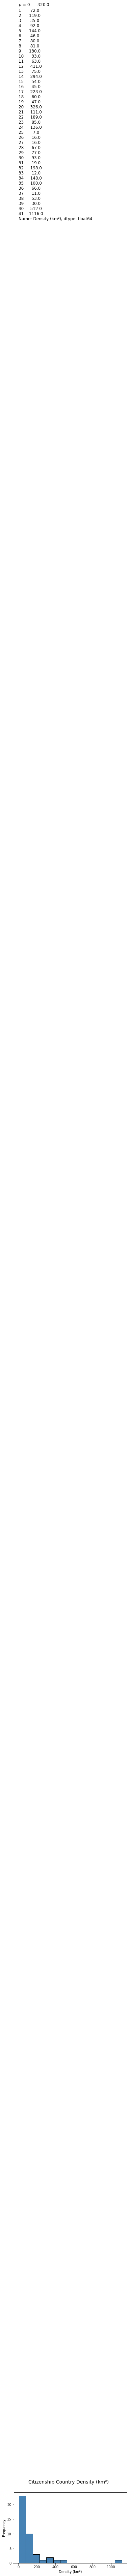

In [151]:
# Citizenship Country Density (km²) Histogram - Need to refine
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Citizenship Country Density (km²)", fontsize=14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Density (km²)")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$ = '+str(round(citizenship_density_merged_renamed['Density (km²)'])), 
         fontsize = 12)
freq, bins, patches = ax.hist(citizenship_density_merged_renamed['Density (km²)'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

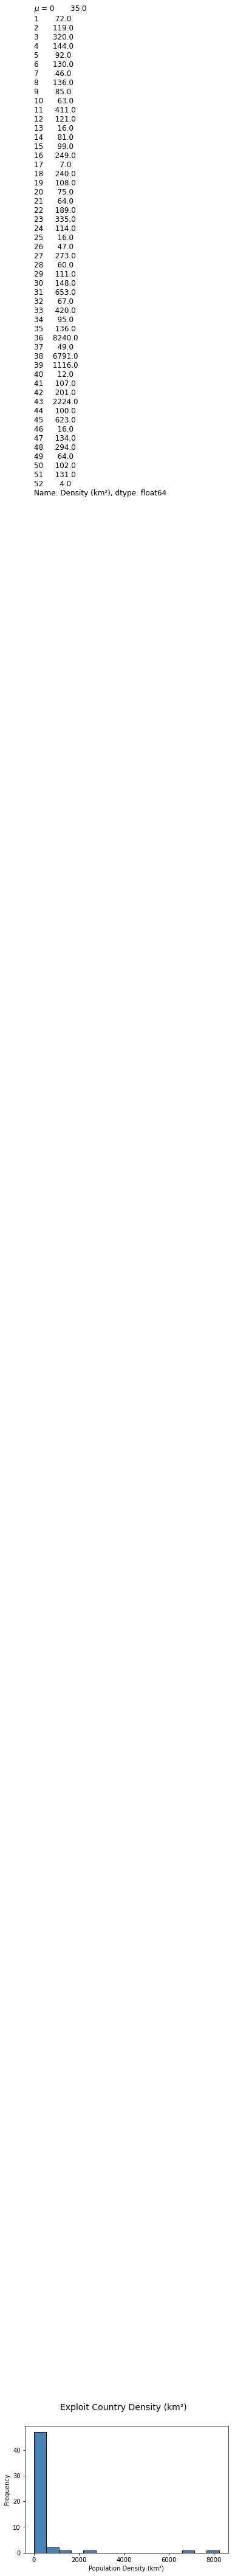

In [184]:
# Exploit Country Density (km²) Histogram - Need to refine
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Exploit Country Density (km²)", fontsize=14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Population Density (km²)")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$ = '+str(round(exploit_density_merged_renamed['Density (km²)'])), 
         fontsize = 12)
freq, bins, patches = ax.hist(exploit_density_merged_renamed['Density (km²)'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

In [ ]:
# Some sort of Individual Analysis for Top 3-5 Populace Dense Countries?



In [ ]:
# Box Plot?


# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

Text(1.2, 140, 'r value = 0.041')

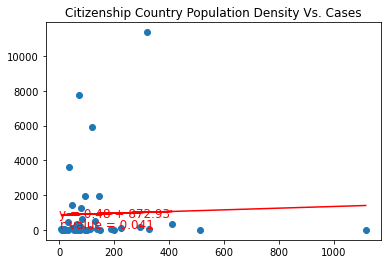

In [185]:
# Citizenship Country Scatterplot
from scipy.stats import linregress

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title('Citizenship Country Population Density Vs. Cases')
ax.set_xlabel("Country Population Density (km²)")
ax.set_ylabel("Human Trafficking Cases")

x_values = citizenship_density_merged_renamed['Density (km²)']
y_values = citizenship_density_merged_renamed['Total Cases']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " + " + str(round(intercept,2))
rvalue_note = (f'r value = {round(rvalue,3)}')

plt.annotate(line_eq,(0,750),fontsize=12,color="red")
plt.annotate(rvalue_note,(1.2,140),fontsize=12,color="red")

# Could go well in Data Analysis / Discussion Slides